In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("sotc.xlsx")
data.head()

,Date,Year,Competition,CompetitionSet,Sport,Discipline,Gender,Rank,Medal,TeamMembers,...,Sec/Mtr/Pts,Host City,Host Country,HostContinent,Participants,Countries,Continents,World Ranking,RankWithinCountry,Is Olympic Discipline
0,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,4,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,121.0,1,Yes
1,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,5,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,29.0,1,Yes
2,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,6,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,158.0,1,Yes
3,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,7,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,71.0,2,Yes
4,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,8,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,NaN,2,Yes


In [3]:
df = data.copy()
df.head()

,Date,Year,Competition,CompetitionSet,Sport,Discipline,Gender,Rank,Medal,TeamMembers,...,Sec/Mtr/Pts,Host City,Host Country,HostContinent,Participants,Countries,Continents,World Ranking,RankWithinCountry,Is Olympic Discipline
0,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,4,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,121.0,1,Yes
1,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,5,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,29.0,1,Yes
2,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,6,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,158.0,1,Yes
3,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,7,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,71.0,2,Yes
4,2023-11-12,2023,Olympic Qualification Tournament - Asia,Olympic Qualification,Archery,Individual,Men,8,NaN,No,...,NaN,Bangkok,Thailand,Asia,49,21,1,NaN,2,Yes


In [4]:
not_needed_columns=['Date', 'Year', 'Discipline', 'Medal', 'Person/Team', 'Person', 'CompetitionSet', 'PersonGender',
       'Person First Name', 'Person Last Name', 'Team', 'DoB', 'YoB', 'Age (days)', 'AgeGroup','Country',
        'Country Code', 'Result', 'Sec/Mtr/Pts', 'Host City', 'Host Country', 'World Ranking', 'Is Olympic Discipline']

In [5]:
df = df.drop(columns = not_needed_columns)
df.head()

,Competition,Sport,Gender,Rank,TeamMembers,Nationality,Age,HostContinent,Participants,Countries,Continents,RankWithinCountry
0,Olympic Qualification Tournament - Asia,Archery,Men,4,No,IRI,18.0,Asia,49,21,1,1
1,Olympic Qualification Tournament - Asia,Archery,Men,5,No,BAN,21.0,Asia,49,21,1,1
2,Olympic Qualification Tournament - Asia,Archery,Men,6,No,KSA,25.0,Asia,49,21,1,1
3,Olympic Qualification Tournament - Asia,Archery,Men,7,No,IND,39.0,Asia,49,21,1,2
4,Olympic Qualification Tournament - Asia,Archery,Men,8,No,IRI,28.0,Asia,49,21,1,2


In [6]:
print("The number of rows in provided set are: " + 
      "\033[1m" + str(df.shape[0]) + "\033[0m" + 
      "\nThe number of columns in provided dataset are: \033[1m" + str(df.shape[1]) + "\033[0m" + "\n")
print("\033[1mThe datatypes in provided dataset: \033[0m")
print(df.info())

The number of rows in provided set are: 180597
The number of columns in provided dataset are: 12

The datatypes in provided dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180597 entries, 0 to 180596
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Competition        180597 non-null  object 
 1   Sport              180597 non-null  object 
 2   Gender             180597 non-null  object 
 3   Rank               180597 non-null  int64  
 4   TeamMembers        180597 non-null  object 
 5   Nationality        164671 non-null  object 
 6   Age                171585 non-null  float64
 7   HostContinent      179817 non-null  object 
 8   Participants       180597 non-null  int64  
 9   Countries          180597 non-null  int64  
 10  Continents         180597 non-null  int64  
 11  RankWithinCountry  180597 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 16.5+ MB
None


In [7]:
print("\033[1mThe sum of null values in each column: \033[0m")
print(df.isnull().sum())
print("\n")
print("\033[1mHere is the statistical summary of provided data:\033[0m")
df.describe().T

The sum of null values in each column: 
Competition              0
Sport                    0
Gender                   0
Rank                     0
TeamMembers              0
Nationality          15926
Age                   9012
HostContinent          780
Participants             0
Countries                0
Continents               0
RankWithinCountry        0
dtype: int64


Here is the statistical summary of provided data:


,count,mean,std,min,25%,50%,75%,max
Rank,180597.0,13.751070,14.105322,1.0,4.0,9.0,17.0,70.0
Age,171585.0,24.162369,5.487487,9.0,20.0,23.0,27.0,70.0
Participants,180597.0,30.934478,29.531468,1.0,12.0,20.0,40.0,462.0
Countries,180597.0,21.867384,16.639597,1.0,11.0,17.0,27.0,132.0
Continents,180597.0,2.747787,2.144004,1.0,1.0,1.0,5.0,6.0
RankWithinCountry,180597.0,1.239428,0.628577,0.0,1.0,1.0,1.0,17.0


In [8]:
# Treating Missing Values
df.dropna(inplace=True)
df.head()

,Competition,Sport,Gender,Rank,TeamMembers,Nationality,Age,HostContinent,Participants,Countries,Continents,RankWithinCountry
0,Olympic Qualification Tournament - Asia,Archery,Men,4,No,IRI,18.0,Asia,49,21,1,1
1,Olympic Qualification Tournament - Asia,Archery,Men,5,No,BAN,21.0,Asia,49,21,1,1
2,Olympic Qualification Tournament - Asia,Archery,Men,6,No,KSA,25.0,Asia,49,21,1,1
3,Olympic Qualification Tournament - Asia,Archery,Men,7,No,IND,39.0,Asia,49,21,1,2
4,Olympic Qualification Tournament - Asia,Archery,Men,8,No,IRI,28.0,Asia,49,21,1,2


In [9]:
print("\033[1mThe sum of null values in each column: \033[0m")
print(df.isnull().sum())
print("\n")
print("The number of rows in provided set are: " + 
      "\033[1m" + str(df.shape[0]) + "\033[0m" + 
      "\nThe number of columns in provided dataset are: \033[1m" + str(df.shape[1]) + "\033[0m" + "\n\n")
print("\033[1mHere is the statistical summary of provided data:\033[0m")
print(df.describe().T)

The sum of null values in each column: 
Competition          0
Sport                0
Gender               0
Rank                 0
TeamMembers          0
Nationality          0
Age                  0
HostContinent        0
Participants         0
Countries            0
Continents           0
RankWithinCountry    0
dtype: int64


The number of rows in provided set are: 156110
The number of columns in provided dataset are: 12


Here is the statistical summary of provided data:
                      count       mean        std  min   25%   50%   75%  \
Rank               156110.0  14.010147  14.360642  1.0   4.0   9.0  17.0   
Age                156110.0  24.136295   5.564457  9.0  20.0  23.0  27.0   
Participants       156110.0  31.655999  29.150591  1.0  12.0  21.0  41.0   
Countries          156110.0  22.101127  16.749786  1.0  11.0  17.0  27.0   
Continents         156110.0   2.767023   2.153817  1.0   1.0   1.0   5.0   
RankWithinCountry  156110.0   1.253956   0.627184  0.0   1.0   1

In [10]:
# One-Hot-Encoding to change categorical variables to numericals

df = df.join(pd.get_dummies(df.Competition))
df = df.drop("Competition", axis=1)

df = df.join(pd.get_dummies(df.Sport))
df = df.drop("Sport", axis=1)

df = df.join(pd.get_dummies(df.Gender))
df = df.drop("Gender", axis=1)

df = df.join(pd.get_dummies(df.TeamMembers))
df = df.drop("TeamMembers", axis=1)

df = df.join(pd.get_dummies(df.HostContinent))
df = df.drop("HostContinent", axis=1)

df = df.join(pd.get_dummies(df.Nationality))
df = df.drop("Nationality", axis=1)


In [11]:
print("The number of rows after one-hot encoding are: " + 
      "\033[1m" + str(df.shape[0]) + "\033[0m" + 
      "\nThe number of columns after one-hot encoding are: \033[1m" + str(df.shape[1]) + "\033[0m" + "\n\n")
df.head()

The number of rows after one-hot encoding are: 156110
The number of columns after one-hot encoding are: 152




,Rank,Age,Participants,Countries,Continents,RankWithinCountry,3x3 Asia Cup,3x3 World Cup,Asia Cup,Asia-Oceania Championships,...,TKM,TLS,TPE,TUR,UAE,UKR,USA,UZB,VIE,YEM
0,4,18.0,49,21,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,21.0,49,21,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,25.0,49,21,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,39.0,49,21,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,28.0,49,21,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Moving Rank Column to the end of dataframe

df["Rank"] = df.pop("Rank")

# Data Shuffling & Resetting Index

shuffled_df = df.sample(frac=1, random_state=42)
shuffled_df.reset_index(drop=True, inplace=True)
shuffled_df.head()

,Age,Participants,Countries,Continents,RankWithinCountry,3x3 Asia Cup,3x3 World Cup,Asia Cup,Asia-Oceania Championships,Asian Championship,...,TLS,TPE,TUR,UAE,UKR,USA,UZB,VIE,YEM,Rank
0,24.0,12,10,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,60.0,41,16,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
2,22.0,21,21,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,30.0,6,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,19.0,39,39,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36


In [13]:
# Model Training

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [14]:
y_pred = rf.predict(X_test_scaled)
print("The accuracy of built model is: " + 
      "\033[1m" + str(round(rf.score(X_test_scaled, y_test)*100,2)) + "%\033[0m")

The accuracy of built model is: 79.56%


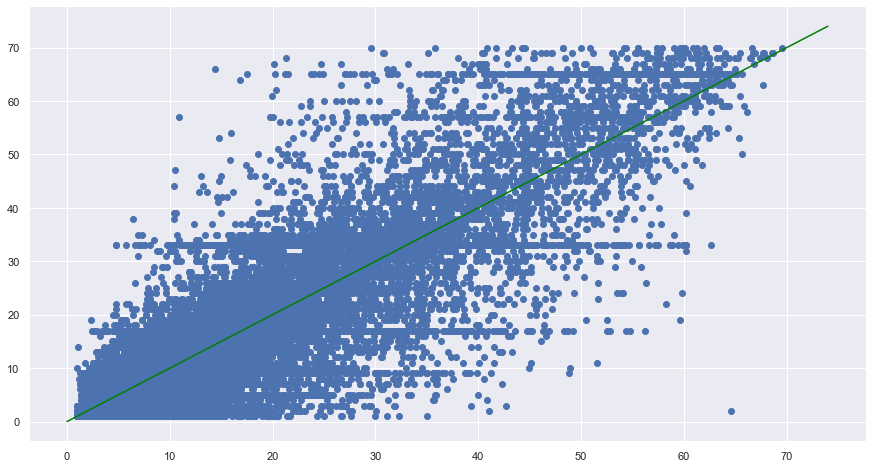

In [15]:
plt.scatter(y_pred, y_test)
plt.plot(range(0, 75), range(0, 75), c="GREEN")

In [16]:
print("\033[1mTesting Dataset \033[0m")
X_new_scaled = scaler.transform([X_test.iloc[3]])
print("\nTest_A\nThe actual Rank is: " + str(y_test.iloc[3]))
print("The predicted Rank is: " + str(rf.predict(X_new_scaled)))
X_new_scaled = scaler.transform([X_test.iloc[0]])
print("\nTest_B\nThe actual Rank is: " + str(y_test.iloc[0]))
print("The predicted Rank is: " + str(rf.predict(X_new_scaled)))
X_new_scaled = scaler.transform([X_test.iloc[7]])
print("\nTest_C\nThe actual Rank is: " + str(y_test.iloc[7]))
print("The predicted Rank is: " + str(rf.predict(X_new_scaled)))

Testing Dataset 

Test_A
The actual Rank is: 3
The predicted Rank is: [3.87666667]

Test_B
The actual Rank is: 3
The predicted Rank is: [4.81]

Test_C
The actual Rank is: 9
The predicted Rank is: [10.89]


In [17]:
!pip install nbconvert[webpdf]